#1. Import Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, model_from_json
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tabulate import tabulate
import os
import numpy as np
import pandas as pd
import random

#2. Load Dataset

In [ ]:
train_dir = '/content/drive/MyDrive/tomato_dataset/train'
val_dir = '/content/drive/MyDrive/tomato_dataset/validation'

#3. Augmentasi and Preprocessing Data

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


val_datagen = ImageDataGenerator(rescale = 1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'categorical',
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 1383 images belonging to 5 classes.
Found 421 images belonging to 5 classes.


#4. Model Building

In [ ]:
def create_model():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fourth convolution
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.BatchNormalization(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(5, activation='softmax')
  ])

  model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics = ['accuracy'])

  return model

In [ ]:
model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 256)       0

#5. Model Fiiting

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights=True)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=100,
    callbacks = [early_stopping]
)


Epoch 1/100
43/43 [==============================] - 671s 16s/step - loss: 1.4073 - accuracy: 0.4249 - val_loss: 1.5492 - val_accuracy: 0.4519
Epoch 2/100
43/43 [==============================] - 276s 6s/step - loss: 1.3095 - accuracy: 0.4789 - val_loss: 1.5344 - val_accuracy: 0.4014
Epoch 3/100
43/43 [==============================] - 260s 6s/step - loss: 1.2035 - accuracy: 0.5204 - val_loss: 1.5007 - val_accuracy: 0.5312
Epoch 4/100
43/43 [==============================] - 275s 6s/step - loss: 1.1502 - accuracy: 0.5529 - val_loss: 1.4570 - val_accuracy: 0.5385
Epoch 5/100
43/43 [==============================] - 261s 6s/step - loss: 1.1047 - accuracy: 0.5559 - val_loss: 1.4236 - val_accuracy: 0.5697
Epoch 6/100
43/43 [==============================] - 255s 6s/step - loss: 1.0522 - accuracy: 0.5722 - val_loss: 1.3805 - val_accuracy: 0.5192
Epoch 7/100
43/43 [==============================] - 272s 6s/step - loss: 1.0055 - accuracy: 0.6018 - val_loss: 1.3150 - val_accuracy: 0.5120
Epoch

#6. Evaluasi Model

In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy*100:.2f}%")

14/14 [==============================] - 20s 1s/step - loss: 0.5009 - accuracy: 0.8337
Validation Accuracy: 83.37%


#7. Visualization of training results

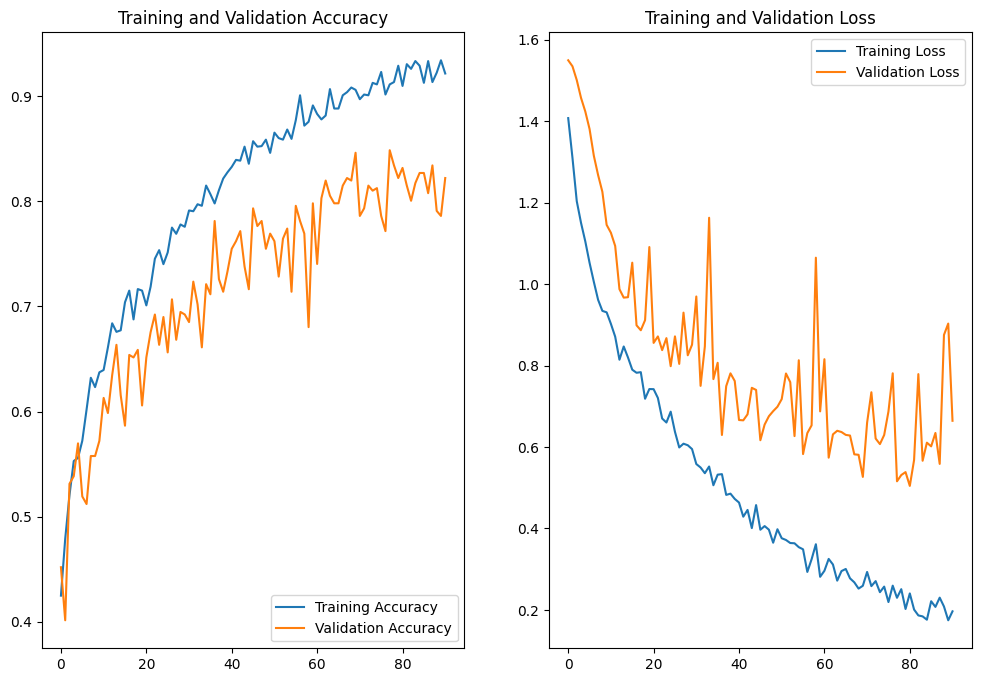

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(91)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


#8. Save Model

In [ ]:
# Save the entire model to an HDF5 file
model.save('model.h5')
print("Model disimpan sebagai model.h5")

# Save the model architecture to a JSON file
json_config = model.to_json()
with open('model_config.json', 'w') as json_file:
    json_file.write(json_config)
print("Arsitektur model disimpan sebagai model_config.json")

# Save model weights to HDF5 file
model.save_weights('model_weights.h5')
print("Bobot model disimpan sebagai model_weights.h5")

# Load the model architecture from the JSON file
with open('model_config.json', 'r') as json_file:
    json_config = json_file.read()
new_model = model_from_json(json_config)
print("Arsitektur model dimuat dari model_config.json")

# Load model weights from HDF5 file
new_model.load_weights('model_weights.h5')
print("Bobot model dimuat dari model_weights.h5")

# Convert model weights to binary format and save as .bin file
weights = model.get_weights()
with open('model_weights.bin', 'wb') as bin_file:
    for weight in weights:
        bin_file.write(weight.tobytes())
print("Bobot model disimpan sebagai model_weights.bin")

# Loads model weights from  .bin file
def load_weights_from_bin(model, bin_path):
    weights = model.get_weights()
    with open(bin_path, 'rb') as bin_file:
        for i in range(len(weights)):
            weights[i] = np.frombuffer(bin_file.read(weights[i].nbytes), dtype=weights[i].dtype).reshape(weights[i].shape)
    model.set_weights(weights)

load_weights_from_bin(new_model, 'model_weights.bin')
print("Bobot model dimuat dari model_weights.bin")

# Evaluate newly loaded models to ensure compliance
# new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# evaluation = new_model.evaluate(validation_data)
# print(f"Evaluation of model accuracy: {evaluation[1]}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model disimpan sebagai model.h5
Arsitektur model disimpan sebagai model_config.json
Bobot model disimpan sebagai model_weights.h5
Arsitektur model dimuat dari model_config.json
Bobot model dimuat dari model_weights.h5
Bobot model disimpan sebagai model_weights.bin
Bobot model dimuat dari model_weights.bin


#9. Load and use the model

In [ ]:
model = load_model('/content/model.h5')
uploaded = files.upload()
class_name = ['Blossom-end-rottation', 'Cracking', 'Healthy', 'Spliting', 'Sun-scaled']

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = load_img(path, target_size=(150, 150))
  x = img_to_array(img)
  x = np.expand_dims(x, axis=0)

  predictions = model.predict(x)

  predicted_class_index = np.argmax(predictions)

  predicted_class_name = class_name[predicted_class_index]

  print("Predicted class for", fn, ":", predicted_class_name)

Saving crack1_png.rf.2a1636fab6d73ddae19771706d29bec5.jpg to crack1_png.rf.2a1636fab6d73ddae19771706d29bec5.jpg
1/1 [==============================] - 0s 143ms/step
Predicted class for crack1_png.rf.2a1636fab6d73ddae19771706d29bec5.jpg : Cracking
